## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

# Variable Description

PassengerId: unique id number to each passenger

Survived: Survival status ( 0 = No, 1 = Yes )

Pclass: Ticket class ( 1 = 1st, 2 = 2nd, 3 = 3rd )

Name: Passengers' name 

Sex: Gender of passenger

Age: Age in years ( Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5 )

SibSp: # of siblings / spouses aboard the Titanic

Parch: # of parents / children aboard the Titanic	

Ticket: Ticket number

Fare: Passenger fare

Cabin: Cabin number

Embarked: Port of Embarkation ( C = Cherbourg, Q = Queenstown, S = Southampton )

# Import Libraries

In [1]:
!pip install matplotlib

!pip install seaborn

In [2]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# Load and Check Data

In [3]:
titanic = pd.read_csv("titanic.csv")

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Generate a summary statistics

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# First look at the variables

## Distribution of Survival rate

In [6]:
#Frequency table of Survival rate

survival_rate = titanic['Survived'].value_counts()

survival_rate

Survived
0    549
1    342
Name: count, dtype: int64

In [7]:
# Percentage of Survival rate

survival_pect = survival_rate/ survival_rate.sum() * 100
survival_pect

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

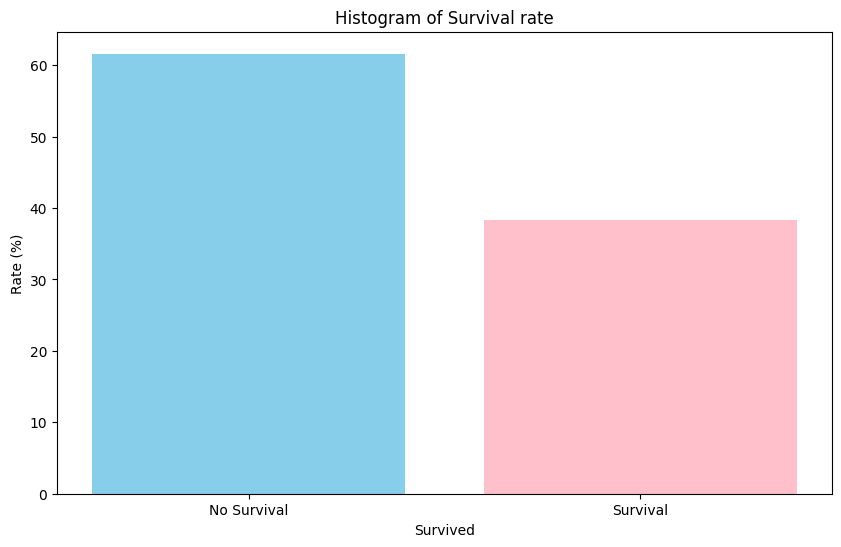

In [8]:
# Visualization of Survival rate

plt.figure(figsize=(10, 6)) 

lables = ['No Survival', 'Survival']

plt.bar(lables, survival_pect, color = ["skyblue", "pink"])

plt.xlabel("Survived")
plt.ylabel("Rate (%)")
plt.title("Histogram of Survival rate")

plt.savefig("survival rate.jpg", format="jpeg")

plt.show()

## Distribution of "Pclass", "Sex", "Cabin", "Embarked"

### Write a function to draw categorical bar charts

In [9]:
def titanic_bars(variable):
    """
    "variable" is the column's name 
    
    Return:
        "The frequency table and bar chart of the desired variable. "
    """
    # Count the frequency of variable
    
    sub_freq = titanic[variable].value_counts()
    
    sub_pect = sub_freq / sub_freq.sum()*100
        
    # Plot the bar chart 
    
    plt.figure(figsize=(10, 6)) 

    plot_bar = plt.bar(sub_pect.index, sub_pect, color = ["pink"])

    plt.xlabel(variable)
    plt.ylabel("Percentage (%)")
    plt.title( f"Bar chart of {variable}")
    
    plt.savefig(f"{variable}.jpg", format="jpeg")
    
    plt.show()
    
    print (sub_freq )

### Apply the funtion 

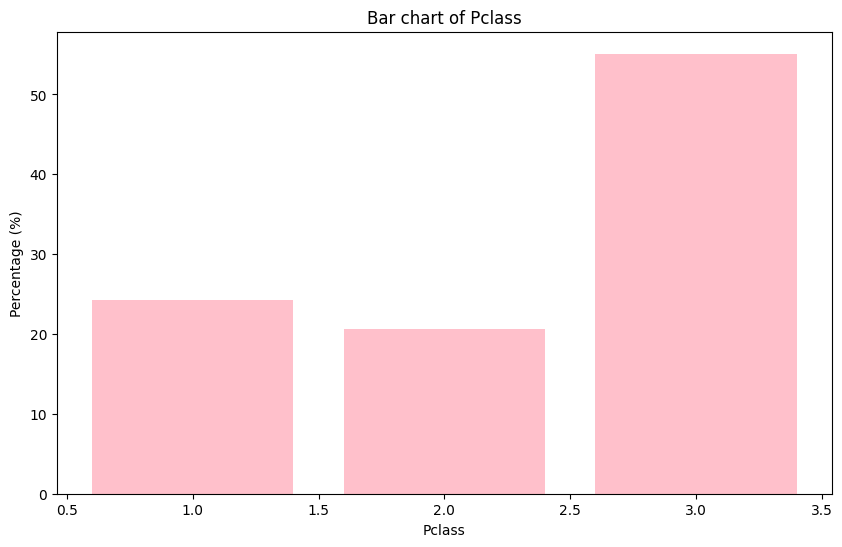

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


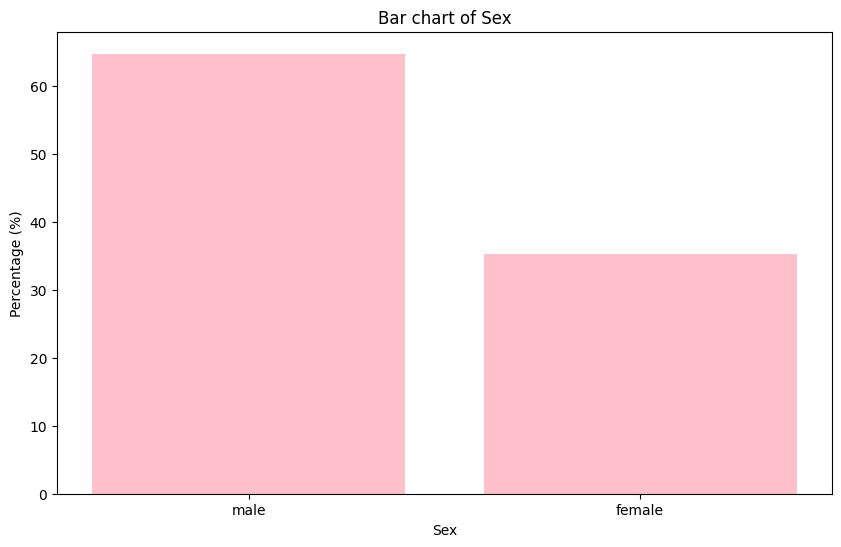

Sex
male      577
female    314
Name: count, dtype: int64


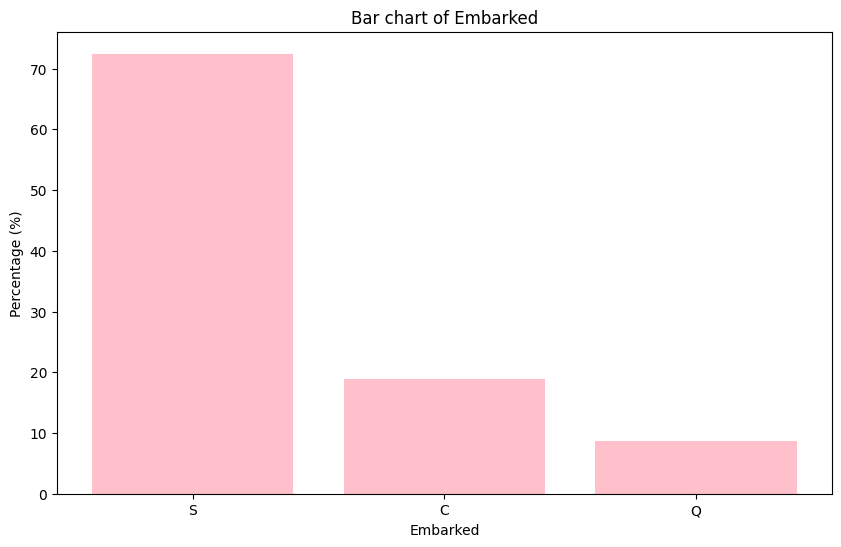

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


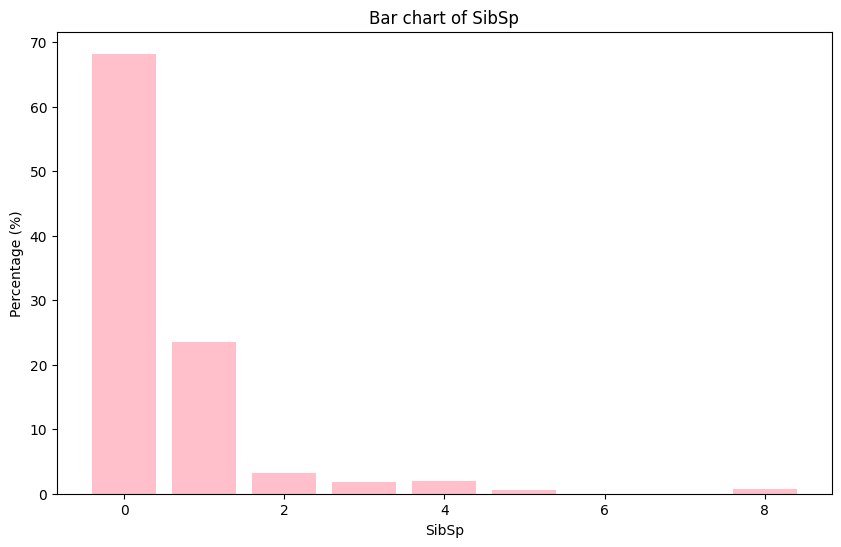

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


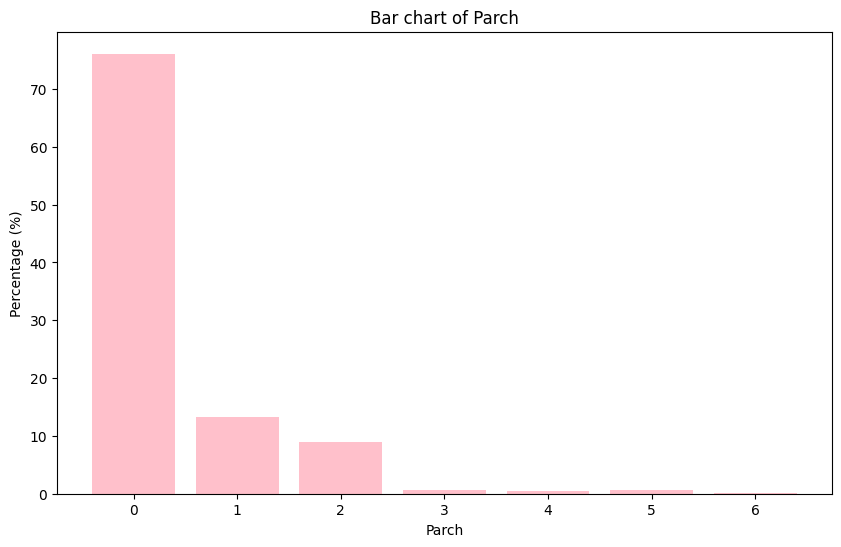

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [10]:
column_name = ["Pclass", "Sex", "Embarked", "SibSp", "Parch"]

for i in column_name:
    titanic_bars(i)

## Distribution of Age 

In [11]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [12]:
titanic['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

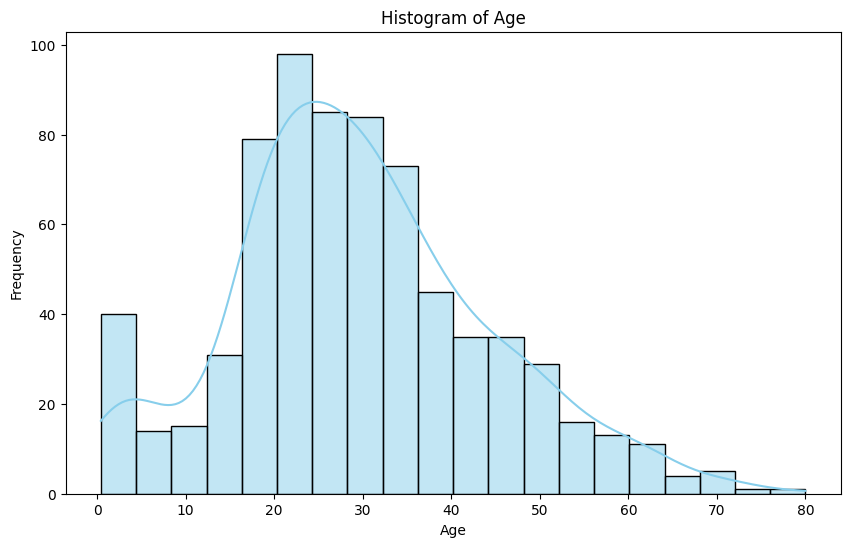

In [13]:
plt.figure(figsize=(10, 6))  

sns.histplot(data = titanic, x='Age', kde=True, color='skyblue', bins=20)

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")

plt.savefig("Age.jpg", format="jpeg")

plt.show()

## Determine if the survival rate is associated to the class of passenger

### Two-way table

In [14]:
pclass_survived = titanic.groupby('Pclass')["Survived"].value_counts()

pclass_survived

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

### Percentage of survival rate based on the level of Pclass.

In [15]:
percentage_pclass_survived = pd.DataFrame(titanic.groupby('Pclass')["Survived"].value_counts(normalize=True) * 100)

percentage_pclass_survived.reset_index(inplace = True)

percentage_pclass_survived

,Pclass,Survived,proportion
0,1,1,62.962963
1,1,0,37.037037
2,2,0,52.717391
3,2,1,47.282609
4,3,0,75.763747
5,3,1,24.236253


### Visualization survival percentage based on Pclass

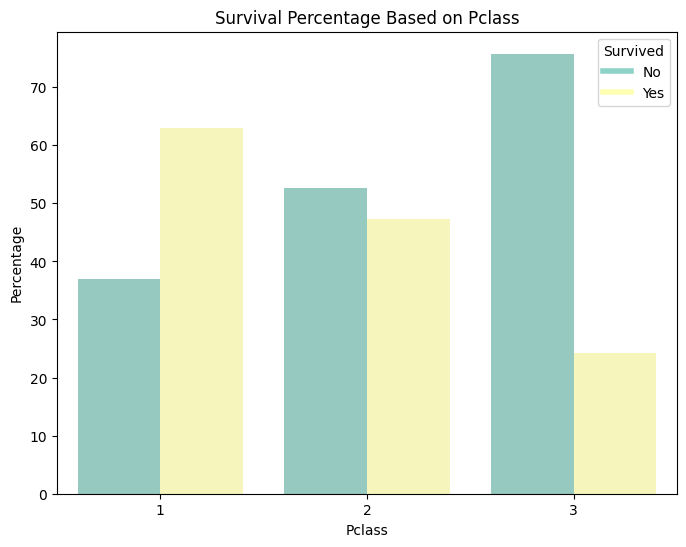

In [16]:
plt.figure(figsize=(8, 6))

sns.barplot(data=percentage_pclass_survived, x= "Pclass", y="proportion", hue="Survived", palette="Set3")

plt.xlabel("Pclass")
plt.ylabel("Percentage")
plt.title("Survival Percentage Based on Pclass")

legend_labels = ["No", "Yes"]
legend_handles = [plt.Line2D([0], [0], color=sns.color_palette("Set3")[i], lw=4) for i in range(2)]
plt.legend(legend_handles, legend_labels, title="Survived")

plt.savefig("Based on Pclass.jpg", format="jpeg")

plt.show()

## Determine if the survival rate is associated to the gender

### Two-way table

In [17]:
gender_survived = titanic.groupby('Sex')["Survived"].value_counts()

gender_survived

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

### Percentage of survival rate based on gender

In [18]:
percentage_gender_survived = pd.DataFrame(titanic.groupby('Sex')["Survived"].value_counts(normalize=True) * 100)
percentage_gender_survived.reset_index(inplace=True)
percentage_gender_survived

,Sex,Survived,proportion
0,female,1,74.203822
1,female,0,25.796178
2,male,0,81.109185
3,male,1,18.890815


### Visualization survival percentage based on gender

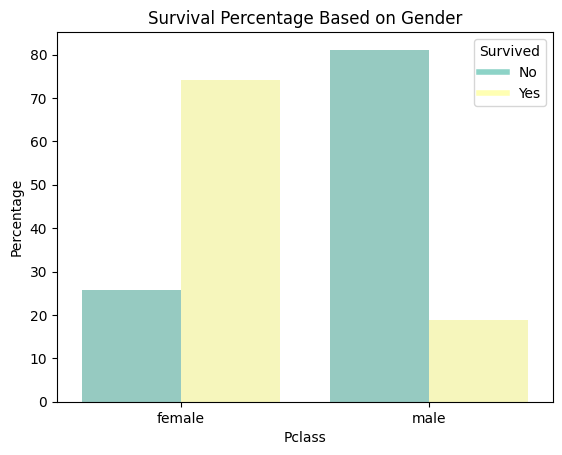

In [19]:
sns.barplot(data=percentage_gender_survived, x="Sex", y="proportion", hue="Survived", palette="Set3")

plt.xlabel("Pclass")
plt.ylabel("Percentage")
plt.title("Survival Percentage Based on Gender")

plt.legend(title="Survived", labels=["No", "Yes"])

legend_handles = [plt.Line2D([0], [0], color=sns.color_palette("Set3")[i], lw=4) for i in range(2)]
plt.legend(legend_handles, legend_labels, title="Survived")

plt.savefig("Based on Gender.jpg", format="jpeg")

plt.show()

## Determine the survival rate is associated to the age

### Distribution of Age with the survived status

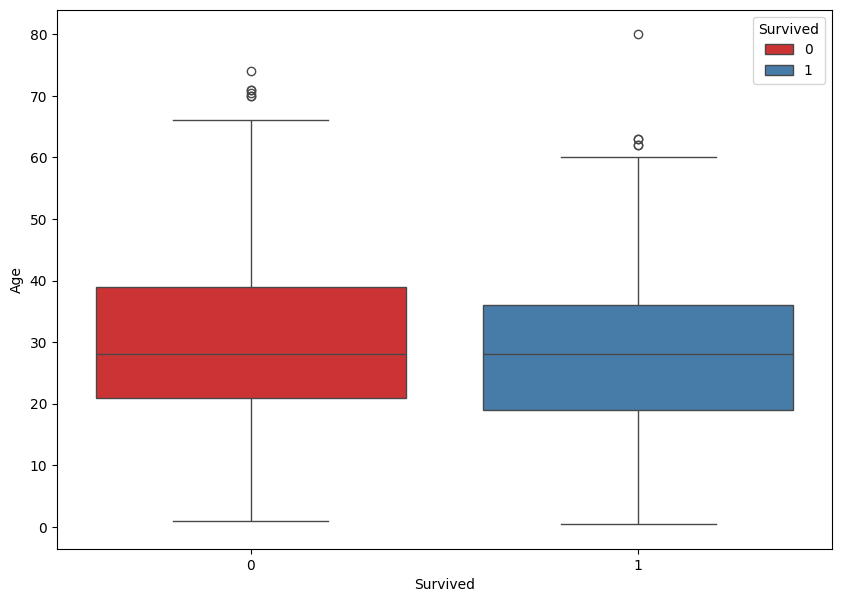

In [20]:
plt.figure(figsize=(10,7))

sns.boxplot(x='Survived',y='Age',data=titanic, hue="Survived", palette="Set1")

plt.savefig("Based on Age.jpg", format="jpeg")

plt.show()

### Two-way table

In [21]:
titanic["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [22]:
# Define age group bins and labels
age_bins = [0, 17, 30, 60, 100]
age_labels = ["0-17", "18-29", "30-59", "60+"]

# Create a new column "AgeGroup" with the age group labels
titanic["AgeGroup"] = pd.cut(titanic["Age"], bins=age_bins, labels=age_labels)

# Create a two-way table of age group vs. survival
age_group_survival = pd.crosstab(titanic["AgeGroup"], titanic["Survived"])

# Calculate the survival rate as a percentage
age_group_survival["No (%)"] = (age_group_survival[0] / age_group_survival[[0, 1]].sum(axis=1) * 100).round(2)
age_group_survival["Yes (%)"] = (age_group_survival[1] / age_group_survival[[0, 1]].sum(axis=1) * 100).round(2)

age_group_survival.reset_index(inplace = True)

age_group_survival

Survived,AgeGroup,0,1,No (%),Yes (%)
0,0-17,52,61,46.02,53.98
1,18-29,191,105,64.53,35.47
2,30-59,164,119,57.95,42.05
3,60+,17,5,77.27,22.73


In [23]:
# Transpose data to draw side-by-side bar chart

age_group_survival_melted = age_group_survival.melt(id_vars=["AgeGroup"], var_name="Survived", value_name="Survival Rate (%)", value_vars = ["No (%)", "Yes (%)"])

age_group_survival_melted

,AgeGroup,Survived,Survival Rate (%)
0,0-17,No (%),46.02
1,18-29,No (%),64.53
2,30-59,No (%),57.95
3,60+,No (%),77.27
4,0-17,Yes (%),53.98
5,18-29,Yes (%),35.47
6,30-59,Yes (%),42.05
7,60+,Yes (%),22.73


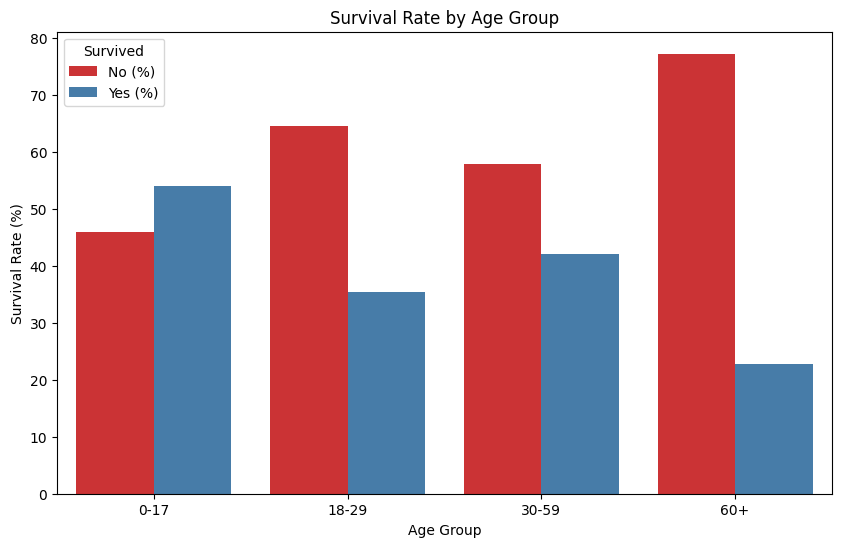

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_survival_melted, x="AgeGroup", y="Survival Rate (%)", hue="Survived", palette = "Set1")

plt.xlabel("Age Group")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Age Group")

plt.legend(title="Survived")
plt.savefig("Based on Age2.jpg", format="jpeg")

plt.show()